In [16]:
import importlib
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

import utility_v1
import propagators_v1
import energy_landscapes_v1

import parallel_simulations_v1
import weighted_ensemble_v1
import metadynamics_v1
import multiple_walker_metadynamics_v1

import visualization_v1

#methods for fast print debugging #<---- these probably belong in utility_v1.py
def p(x):
    print(x)
def pl(x):
    print(len(x))
def ps(x):
    print(x.shape)

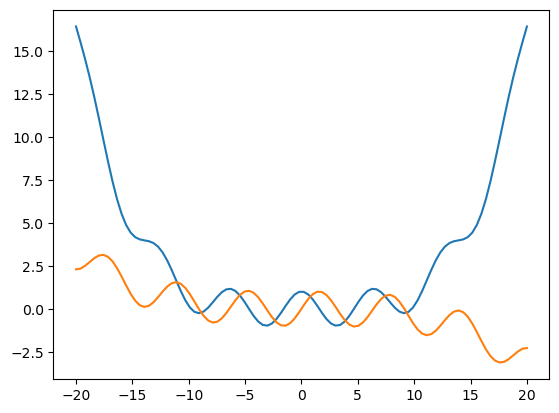

In [17]:
kT = 1
dt = 0.001

importlib.reload(energy_landscapes_v1)

system1 = energy_landscapes_v1.unit_sine_well()
system1.plot_quantity(system1.potential)
system1.plot_quantity(system1.F)
plt.show()

running 750 parallel multiple walker metadynamics simulations for 20000 steps each
molecular time: 20000 steps;  aggregate time: 15000000 steps
data points saved: 150000.0 at 100-step intervals
gaussians of height 0.005 are added every 100 steps
running segment 1 of 10
running segment 2 of 10
running segment 3 of 10
running segment 4 of 10
running segment 5 of 10
running segment 6 of 10
running segment 7 of 10
running segment 8 of 10
running segment 9 of 10
running segment 10 of 10
running 750 parallel simulations for 20000 steps each
molecular time: 20000 steps;  aggregate time: 15000000 steps
data points saved: 150000.0 at 100-step intervals
running segment 1 of 10
running segment 2 of 10
running segment 3 of 10
running segment 4 of 10
running segment 5 of 10
running segment 6 of 10
running segment 7 of 10
running segment 8 of 10
running segment 9 of 10
running segment 10 of 10
running weighted ensemble with 6 walkers per bin in 102 bins for 200 WE rounds of 100 steps each
molecular 

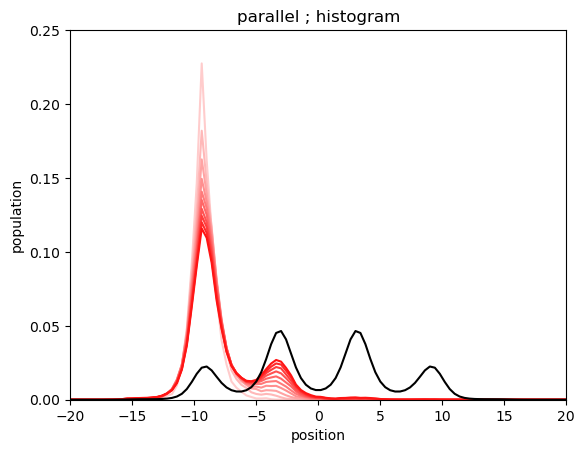

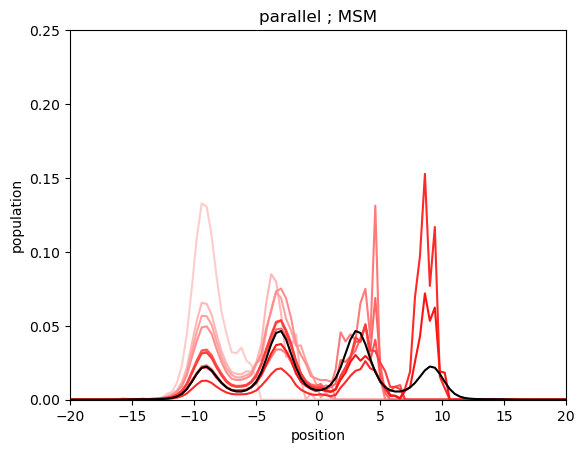

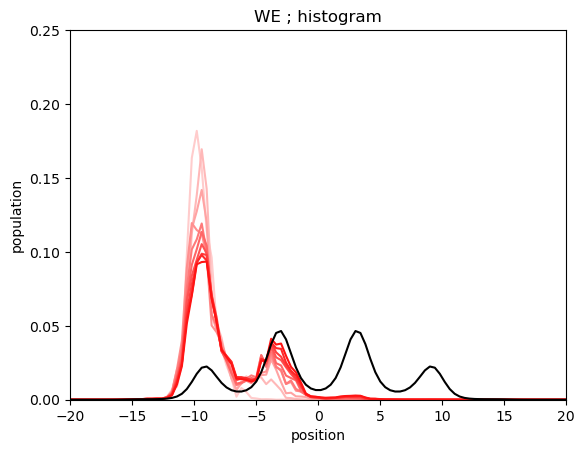

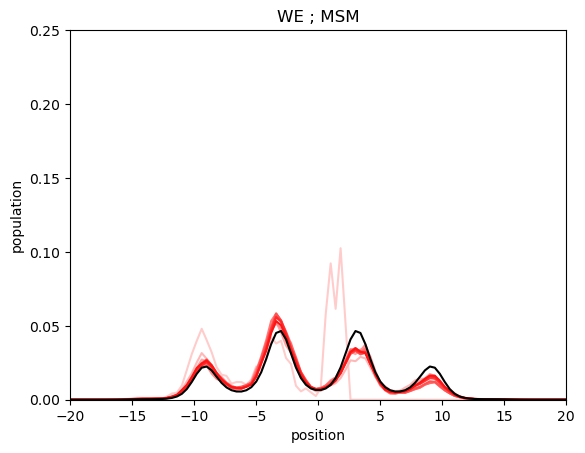

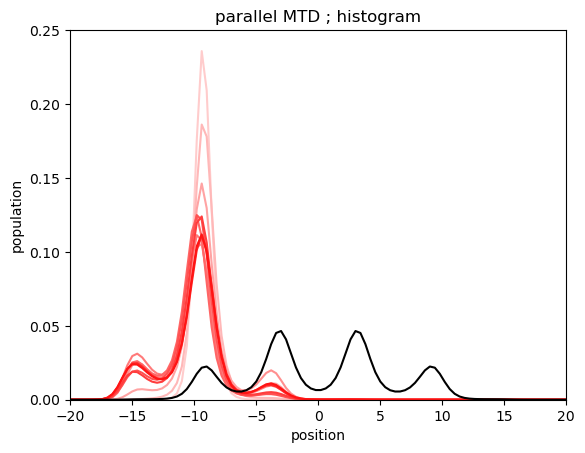

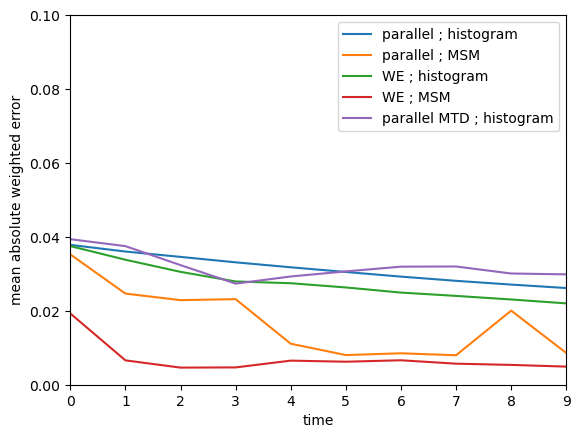

In [30]:
importlib.reload(utility_v1)
importlib.reload(propagators_v1)
importlib.reload(energy_landscapes_v1)

importlib.reload(parallel_simulations_v1)
importlib.reload(weighted_ensemble_v1)
importlib.reload(metadynamics_v1)
importlib.reload(multiple_walker_metadynamics_v1)

importlib.reload(visualization_v1)

#hyperparameters for estimating convergence
n_timepoints = 10
n_bootstrap = 3

#binning parameters
n_analysis_bins = 100
#save frequency

#simulation time limits (integration steps)
aggregate_simulation_limit = 15000000
#frame_save_limit = 100000
molecular_time_limit = 20000

#move the number of WE rounds out here; number of data points should be held constant across methods because it reflects lab storage capacity
we_rounds_per_timepoint = 20
save_period = int(round(molecular_time_limit/(we_rounds_per_timepoint*n_timepoints))) #in steps

#define bins and calculate the true populations thereof
binbounds, bincenters, step = system1.analysis_bins_1d(n_analysis_bins)
true_populations, true_energies = system1.normalized_pops_energies(kT, bincenters)


observables_parallel_mtd = multiple_walker_metadynamics_v1.sampler_parallel_hist_mtd(system1, aggregate_simulation_limit, molecular_time_limit, save_period, n_timepoints, kT, dt, binbounds, bincenters)

observables_parallel = parallel_simulations_v1.sampler_parallel_hist(system1, aggregate_simulation_limit, molecular_time_limit, save_period, n_timepoints, kT, dt, binbounds, bincenters)
observables_we = weighted_ensemble_v1.sampler_we_hist(system1, aggregate_simulation_limit, molecular_time_limit, n_timepoints, we_rounds_per_timepoint, kT, dt, binbounds)

landscape_estimates = [[observables_parallel[0], observables_parallel[1], "parallel ; histogram"], 
                       [observables_parallel[2], observables_parallel[3], "parallel ; MSM"], 
                       [observables_we[0], observables_we[1], "WE ; histogram"], 
                       [observables_we[2], observables_we[3], "WE ; MSM"],
                       [observables_parallel_mtd[0], observables_parallel_mtd[1], "parallel MTD ; histogram"]]
                       #[observables_parallel_mtd[2], observables_parallel_mtd[3], "parallel MTD ; MSM"]


#----------------------------------------------------PLOT RESULTS----------------------------------------------------

#landscape estimates
for le in landscape_estimates:
    visualization_v1.plot_landscape_estimate(bincenters, le[1], true_populations, le[2], xrange = (-20,20), yrange = (0,0.25))


#convergence over time
for le in landscape_estimates:
    plt.plot(le[0])

plt.legend([le[2] for le in landscape_estimates])
plt.xlabel("time")
plt.ylabel("mean absolute weighted error")

plt.xlim(0,n_timepoints-1)
plt.ylim(0,0.1)

plt.show()


In [ ]:

#---------------------------------------------------------------------------------------------------------------------------

# #bin boundaries along each dimension
# binbounds = [np.linspace(system1.standard_analysis_range[0][0], system1.standard_analysis_range[1][0], 14+1),
#              np.linspace(system1.standard_analysis_range[0][1], system1.standard_analysis_range[1][1], 6+1)]

# #get true populations
# state_bins = msm_trj_analysis.bin_to_voxels_msmstates(binbounds, system1.x)
# state_pops = msm_trj_analysis.state_to_bin_populations(state_bins, system1.p)

# #run sampler
# est_state_pop_convergence_we, maew_convergence_we = weighted_ensemble_4.sampler_we_hist(system1, int(nsteps/10), n_timepoints, kT, dt, binbounds)
# est_state_pop_convergence_parallel, maew_convergence_parallel = msm_trj_long_simulation.sampler_parallel_hist(system1, n_parallel, nsteps, save_period, n_timepoints, kT, dt, binbounds)

# #plot results
# for espc in est_state_pop_convergence_parallel:
#     plt.plot(espc)

# plt.plot(state_pops, color="black")
# plt.show()

# #plot results
# for espc in est_state_pop_convergence_we:
#     plt.plot(espc)

# plt.plot(state_pops, color="black")
# plt.show()

# plt.plot(maew_convergence_parallel)
# plt.plot(maew_convergence_we)
# plt.show()